In [7]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
df = pd.read_csv('chess_masters_WCC.csv')
df.columns

Index(['Event', 'Site', 'Date', 'EventDate', 'ECO', 'Round', 'White', 'Black',
       'Result', 'Moves'],
      dtype='object')

In [29]:
df_nodes=df.groupby(by='White').agg({'Round':['max','count'],'Result':'size'})
df_nodes.columns = df_nodes.columns.get_level_values(-1)
df_edge=df


> 读取数据和构图

In [35]:
df_nodes.reset_index(inplace=True)
df


,Event,Site,Date,EventDate,ECO,Round,White,Black,Result,Moves
0,World Championship 1st,USA,1886.01.11,1886.01.11,D11,1,"Zukertort, Johannes H","Steinitz, Wilhelm",0-1,d2d4 d7d5 c2c4 c7c6 e2e3 c8f5 b1c3 e7e6 g1f3 b...
1,World Championship 1st,USA,1886.01.13,1886.01.11,C47,2,"Steinitz, Wilhelm","Zukertort, Johannes H",0-1,e2e4 e7e5 g1f3 b8c6 d2d4 e5d4 f3d4 g8f6 b1c3 f...
2,World Championship 1st,USA,1886.01.15,1886.01.11,D10,3,"Zukertort, Johannes H","Steinitz, Wilhelm",1-0,d2d4 d7d5 c2c4 c7c6 e2e3 c8f5 a2a3 e7e6 c4c5 a...
3,World Championship 1st,USA,1886.01.18,1886.01.11,C67,4,"Steinitz, Wilhelm","Zukertort, Johannes H",0-1,e2e4 e7e5 g1f3 b8c6 f1b5 g8f6 e1g1 f6e4 f1e1 e...
4,World Championship 1st,USA,1886.01.20,1886.01.11,D10,5,"Zukertort, Johannes H","Steinitz, Wilhelm",1-0,d2d4 d7d5 c2c4 c7c6 b1c3 g8f6 e2e3 c8f5 c4d5 c...
...,...,...,...,...,...,...,...,...,...,...
680,World Championship 31th,Moscow RUS,1985.01.21,1984.09.10,C92,44,"Kasparov, Gary","Karpov, Anatoly",1/2-1/2,e2e4 e7e5 g1f3 b8c6 f1b5 a7a6 b5a4 g8f6 e1g1 f...
681,World Championship 31th,Moscow RUS,1985.01.23,1984.09.10,B85,45,"Karpov, Anatoly","Kasparov, Gary",1/2-1/2,e2e4 c7c5 g1f3 d7d6 d2d4 c5d4 f3d4 g8f6 b1c3 a...
682,World Championship 31th,Moscow RUS,1985.01.28,1984.09.10,C92,46,"Kasparov, Gary","Karpov, Anatoly",1/2-1/2,e2e4 e7e5 g1f3 b8c6 f1b5 a7a6 b5a4 g8f6 e1g1 f...
683,World Championship 31th,Moscow RUS,1985.01.30,1984.09.10,D52,47,"Karpov, Anatoly","Kasparov, Gary",0-1,g1f3 g8f6 c2c4 e7e6 d2d4 d7d5 b1c3 c7c6 c1g5 b...


In [34]:
df_nodes.head()

,White,max,count,size
0,"Alekhine, Alexander A",34,70,70
1,"Bogoljubow, Efim D",25,25,25
2,"Botvinnik, Mikhail M",24,87,87
3,"Bronstein, David I",24,12,12
4,"Capablanca, Jose Raul",33,24,24


棋手（节点）个数 25
棋局（连接）个数 685


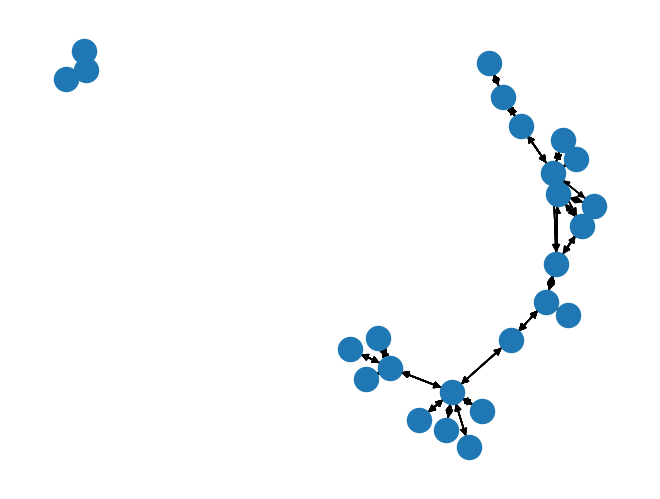

In [76]:
# nx.Graph无向单重图，nx.DiGraph有向单重图
# 多重图（MultiGraph 或 MultiDiGraph） edge_key 参数用于指定 DataFrame 中哪一列的值将用作边的键
G = nx.from_pandas_edgelist(df_edge, 'White', 'Black', ['Event', 'Site', 'Date', 'EventDate', 'ECO', 'Round', 
       'Result', 'Moves'],create_using=nx.MultiDiGraph())
print('棋手（节点）个数', G.number_of_nodes()) # 25
print('棋局（连接）个数', G.number_of_edges()) # 685
pos = nx.spring_layout(G, seed=10)
nx.draw(G, pos) 

In [39]:
# 添加节点属性
for index, row in df_nodes.iterrows():
    G.nodes[row['White']]['round'] = row['max']
    G.nodes[row['White']]['count'] = row['count']

# 打印图中的节点和属性
print("节点和属性:")
for node, attr in G.nodes(data=True):
    print(node, attr)

# 打印图中的边和属性
print("\n边和属性:")
for edge in G.edges(data=True):
    print(edge)


节点和属性:
Zukertort, Johannes H {'round': 19, 'count': 10}
Steinitz, Wilhelm {'round': 22, 'count': 48}
Chigorin, Mikhail I {'round': 23, 'count': 21}
Gunsberg, Isidor A {'round': 18, 'count': 9}
Lasker, Emanuel {'round': 19, 'count': 48}
Marshall, Frank J {'round': 15, 'count': 8}
Tarrasch, Siegbert {'round': 16, 'count': 8}
Janowski, Dawid M {'round': 10, 'count': 10}
Schlechter, Carl {'round': 9, 'count': 5}
Capablanca, Jose Raul {'round': 33, 'count': 24}
Alekhine, Alexander A {'round': 34, 'count': 70}
Bogoljubow, Efim D {'round': 25, 'count': 25}
Euwe, Max {'round': 30, 'count': 38}
Keres, Paul {'round': 25, 'count': 10}
Smyslov, Vassily V {'round': 23, 'count': 44}
Reshevsky, Samuel H {'round': 25, 'count': 10}
Botvinnik, Mikhail M {'round': 24, 'count': 87}
Bronstein, David I {'round': 24, 'count': 12}
Tal, Mikhail N {'round': 21, 'count': 21}
Petrosian, Tigran V {'round': 24, 'count': 34}
Spassky, Boris V {'round': 23, 'count': 35}
Fischer, Robert J {'round': 20, 'count': 10}
Kor

In [40]:
# 计算紧密中心性
closeness = nx.pagerank(G)

# 打印每个节点的紧密中心性
for node, closeness_score in closeness.items():
    print(f"节点 {node} 的紧密中心性为: {closeness_score}")

节点 Zukertort, Johannes H 的紧密中心性为: 0.022181364032748417
节点 Steinitz, Wilhelm 的紧密中心性为: 0.09137488820758341
节点 Chigorin, Mikhail I 的紧密中心性为: 0.03674459166222199
节点 Gunsberg, Isidor A 的紧密中心性为: 0.022181364032748417
节点 Lasker, Emanuel 的紧密中心性为: 0.09281226406327749
节点 Marshall, Frank J 的紧密中心性为: 0.01750463457587839
节点 Tarrasch, Siegbert 的紧密中心性为: 0.01914815380100388
节点 Janowski, Dawid M 的紧密中心性为: 0.024078711476380334
节点 Schlechter, Carl 的紧密中心性为: 0.014217596125627424
节点 Capablanca, Jose Raul 的紧密中心性为: 0.034451710744913405
节点 Alekhine, Alexander A 的紧密中心性为: 0.08209802271987468
节点 Bogoljubow, Efim D 的紧密中心性为: 0.031919057670288846
节点 Euwe, Max 的紧密中心性为: 0.045061621076676016
节点 Keres, Paul 的紧密中心性为: 0.016365012297826918
节点 Smyslov, Vassily V 的紧密中心性为: 0.05247091916514488
节点 Reshevsky, Samuel H 的紧密中心性为: 0.016872724954631442
节点 Botvinnik, Mikhail M 的紧密中心性为: 0.10350668865950037
节点 Bronstein, David I 的紧密中心性为: 0.0181351937826213
节点 Tal, Mikhail N 的紧密中心性为: 0.02723658911958727
节点 Petrosian, Tigran V 的紧密中心性为: 0.0450

# 获取连通子图

In [43]:
# 连通域分析: 将G转为无向图，分析连通域
for each in nx.weakly_connected_components(G):
    print('连通域')
    print(G.subgraph(each))
    print('包含节点')
    print(each)
    print('\n')

连通域
MultiDiGraph with 22 nodes and 587 edges
包含节点
{'Smyslov, Vassily V', 'Fischer, Robert J', 'Tarrasch, Siegbert', 'Tal, Mikhail N', 'Alekhine, Alexander A', 'Euwe, Max', 'Gunsberg, Isidor A', 'Schlechter, Carl', 'Bogoljubow, Efim D', 'Steinitz, Wilhelm', 'Zukertort, Johannes H', 'Marshall, Frank J', 'Janowski, Dawid M', 'Chigorin, Mikhail I', 'Botvinnik, Mikhail M', 'Petrosian, Tigran V', 'Bronstein, David I', 'Reshevsky, Samuel H', 'Spassky, Boris V', 'Lasker, Emanuel', 'Keres, Paul', 'Capablanca, Jose Raul'}


连通域
MultiDiGraph with 3 nodes and 98 edges
包含节点
{'Kasparov, Gary', 'Karpov, Anatoly', 'Korchnoi, Viktor L'}




In [57]:
g1=[x for x in nx.weakly_connected_components(G)][0]
g2=[x for x in nx.weakly_connected_components(G)][1]
G1=G.subgraph(g1)
G2=G.subgraph(g2)

# 图相似
1. 同构图
- nx.is_isomorphic(G1, G2)：检查两个图是否是同构的，即它们是否有相同的结构。
- nx.graph_edit_distance(G1, G2)：计算两个图之间的编辑距离，即通过添加/删除边和节点使一个图变为另一个图所需的最小操作数。
2. -子图同构（Subgraph Isomorphism）
- nx.subgraph_isomorphisms_iter(G1, G2)：返回所有从 G1 到 G2 的子图同构的迭代器。
- nx.node_match(G1, G2)：用于比较两个图时，指定节点匹配的条件。
3. 结构相似度
- nx.similarity.graph_edit_distance(G1, G2)：计算两个图的结构差异。
- nx.similarity.optimize_graph_edit_distance(G1, G2)：优化两个图的结构差异计算。
4. 聚类系数
- nx.average_clustering(G)：计算图的平均聚类系数，可以比较两个图的聚类程度。
5. 谱相似度
- nx.linalg.spectrum（）：使用图的特征值（谱）来比较图的结构。如果两个图的谱相似，它们可能具有相似的结构。
6. 节点属性相似度
- nx.attribute_assortativity_coefficient(G, attribute)：计算节点属性的 assortativity 系数，可以用来比较两个图中节点属性的相似度。


In [61]:
# 检查图是否同构
print(nx.is_isomorphic(G1, G2))

# 计算图编辑距离
ged = nx.graph_edit_distance(G1, G2)
print(f"Graph edit distance: {ged}")


False
Graph edit distance: 508.0


# 提取子图
1. 根据节点列表提取子图

In [68]:
# 创建一个图
G = nx.Graph()
G.add_edges_from([(1, 2), (1, 3), (2, 3), (2, 4), (3, 4)])

# 指定要提取的节点
nodes_to_extract = [1, 2, 3]

# 提取子图
subG = G.subgraph(nodes_to_extract)

# 打印子图
print(subG.nodes())
print(subG.edges())

[1, 2, 3]
[(1, 2), (1, 3), (2, 3)]


2. 根据边列表提取子图

In [69]:
# 指定要提取的边
edges_to_extract = [(1, 2), (1, 3)]

# 创建一个新图，只包含指定的边
subG_from_edges = G.edge_subgraph(edges_to_extract)

# 打印子图
print(subG_from_edges.nodes())
print(subG_from_edges.edges())


[1, 2, 3]
[(1, 2), (1, 3)]


3. 根据节点属性提取子图

In [70]:
# 假设节点有一个属性 'color'，我们想提取颜色为 'red' 的节点
color_to_extract = 'red'
nodes_with_color = [node for node, attr in G.nodes(data=True) if attr.get('color') == color_to_extract]

# 提取子图
subG_with_color = G.subgraph(nodes_with_color)

# 打印子图
print(subG_with_color.nodes())
print(subG_with_color.edges())


[]
[]


4. 提取连通子图

In [71]:
# 获取所有连通分量的节点集合
connected_components = list(nx.connected_components(G))

# 提取第一个连通分量作为子图
subG_connected = G.subgraph(connected_components[0])

# 打印子图
print(subG_connected.nodes())
print(subG_connected.edges())


[1, 2, 3, 4]
[(1, 2), (1, 3), (2, 3), (2, 4), (3, 4)]


5. 提取最大连通子图

In [72]:
# 提取最大连通子图
largest_subG = max(nx.connected_components(G), key=len)
subG_largest_connected = G.subgraph(largest_subG)

# 打印子图
print(subG_largest_connected.nodes())
print(subG_largest_connected.edges())


[1, 2, 3, 4]
[(1, 2), (1, 3), (2, 3), (2, 4), (3, 4)]


6. 提取某点n度以内的邻居子图

In [118]:
from tqdm import tqdm
for x in tqdm(df_nodes.White):
    # 确定中心节点
    center_node =x
    # 找出1度邻居
    first_degree_neighbors = set(G.neighbors(center_node))
    if  len(first_degree_neighbors)>0:
        df_nodes.loc[df_nodes['White']==x,'degree1_nerghbors']=str(first_degree_neighbors)
    else:
        df_nodes.loc[df_nodes['White']==x,'degree1_nerghbors']=np.na()
    # 找出2度邻居
    second_degree_neighbors = set()
    for node in first_degree_neighbors:
        second_degree_neighbors.update(n for n in G.neighbors(node) if n != center_node)
    df_nodes.loc[df_nodes['White']==x,'degree2_nerghbors']=str(second_degree_neighbors)

    # 找出3度邻居
    third_degree_neighbors = set()
    for node in second_degree_neighbors:
        third_degree_neighbors.update(n for n in G.neighbors(node) if n not in first_degree_neighbors and n != center_node)
    df_nodes.loc[df_nodes['White']==x,'degree3_nerghbors']=str(third_degree_neighbors)
    # 合并所有邻居层次
    all_neighbors = first_degree_neighbors | second_degree_neighbors | third_degree_neighbors|{center_node}
    df_nodes.loc[df_nodes['White']==x,'degree123_nerghbors']=str(all_neighbors)
    # 构建子图
    subG = G.subgraph(all_neighbors)

    # 输出子图的节点和边



  0%|          | 0/25 [00:00<?, ?it/s]

100%|██████████| 25/25 [00:00<00:00, 1038.85it/s]


In [119]:
df_nodes.head()

,index,White,max,count,size,degree1_nerghbors,degree2_nerghbors,degree3_nerghbors,degree123_nerghbors
0,0,"Alekhine, Alexander A",34,70,70,"{'Bogoljubow, Efim D', 'Euwe, Max', 'Capablanc...","{'Smyslov, Vassily V', 'Botvinnik, Mikhail M',...","{'Smyslov, Vassily V', 'Botvinnik, Mikhail M',...","{'Smyslov, Vassily V', 'Botvinnik, Mikhail M',..."
1,1,"Bogoljubow, Efim D",25,25,25,"{'Alekhine, Alexander A'}","{'Euwe, Max', 'Capablanca, Jose Raul'}","{'Smyslov, Vassily V', 'Botvinnik, Mikhail M',...","{'Smyslov, Vassily V', 'Botvinnik, Mikhail M',..."
2,2,"Botvinnik, Mikhail M",24,87,87,"{'Smyslov, Vassily V', 'Petrosian, Tigran V', ...","{'Smyslov, Vassily V', 'Reshevsky, Samuel H', ...","{'Fischer, Robert J', 'Bogoljubow, Efim D', 'A...","{'Smyslov, Vassily V', 'Fischer, Robert J', 'B..."
3,3,"Bronstein, David I",24,12,12,"{'Botvinnik, Mikhail M'}","{'Smyslov, Vassily V', 'Petrosian, Tigran V', ...","{'Smyslov, Vassily V', 'Reshevsky, Samuel H', ...","{'Smyslov, Vassily V', 'Botvinnik, Mikhail M',..."
4,4,"Capablanca, Jose Raul",33,24,24,"{'Lasker, Emanuel', 'Alekhine, Alexander A'}","{'Tarrasch, Siegbert', 'Bogoljubow, Efim D', '...","{'Smyslov, Vassily V', 'Botvinnik, Mikhail M',...","{'Smyslov, Vassily V', 'Botvinnik, Mikhail M',..."


In [120]:
for x in ['degree1_nerghbors','degree2_nerghbors','degree3_nerghbors','degree123_nerghbors']:
    df_nodes[x]=df_nodes[x].apply(lambda x: [item.replace('{', '').replace('}', '').replace('\'', '').replace(' ', '') for item in x.split(',')])

In [121]:
df_nodes

,index,White,max,count,size,degree1_nerghbors,degree2_nerghbors,degree3_nerghbors,degree123_nerghbors
0,0,"Alekhine, Alexander A",34,70,70,"[Bogoljubow, Efim D, Euwe, Max, Capablanca...","[Smyslov, Vassily V, Botvinnik, Mikhail M, ...","[Smyslov, Vassily V, Botvinnik, Mikhail M, ...","[Smyslov, Vassily V, Botvinnik, Mikhail M, ..."
1,1,"Bogoljubow, Efim D",25,25,25,"[Alekhine, Alexander A]","[Euwe, Max, Capablanca, Jose Raul]","[Smyslov, Vassily V, Botvinnik, Mikhail M, ...","[Smyslov, Vassily V, Botvinnik, Mikhail M, ..."
2,2,"Botvinnik, Mikhail M",24,87,87,"[Smyslov, Vassily V, Petrosian, Tigran V, ...","[Smyslov, Vassily V, Reshevsky, Samuel H, ...","[Fischer, Robert J, Bogoljubow, Efim D, Al...","[Smyslov, Vassily V, Fischer, Robert J, Bo..."
3,3,"Bronstein, David I",24,12,12,"[Botvinnik, Mikhail M]","[Smyslov, Vassily V, Petrosian, Tigran V, ...","[Smyslov, Vassily V, Reshevsky, Samuel H, ...","[Smyslov, Vassily V, Botvinnik, Mikhail M, ..."
4,4,"Capablanca, Jose Raul",33,24,24,"[Lasker, Emanuel, Alekhine, Alexander A]","[Tarrasch, Siegbert, Bogoljubow, Efim D, E...","[Smyslov, Vassily V, Botvinnik, Mikhail M, ...","[Smyslov, Vassily V, Botvinnik, Mikhail M, ..."
5,5,"Chigorin, Mikhail I",23,21,21,"[Steinitz, Wilhelm]","[Gunsberg, Isidor A, Zukertort, Johannes H,...","[Tarrasch, Siegbert, Janowski, Dawid M, Ma...","[Chigorin, Mikhail I, Zukertort, Johannes H..."
6,6,"Euwe, Max",30,38,38,"[Smyslov, Vassily V, Botvinnik, Mikhail M, ...","[Smyslov, Vassily V, Botvinnik, Mikhail M, ...","[Petrosian, Tigran V, Bronstein, David I, ...","[Smyslov, Vassily V, Botvinnik, Mikhail M, ..."
7,7,"Fischer, Robert J",20,10,10,"[Spassky, Boris V]","[Petrosian, Tigran V]","[Botvinnik, Mikhail M]","[Fischer, Robert J, Spassky, Boris V, Petr..."
8,8,"Gunsberg, Isidor A",18,9,9,"[Steinitz, Wilhelm]","[Zukertort, Johannes H, Lasker, Emanuel, C...","[Tarrasch, Siegbert, Janowski, Dawid M, Ma...","[Chigorin, Mikhail I, Zukertort, Johannes H..."
9,9,"Janowski, Dawid M",10,10,10,"[Lasker, Emanuel]","[Tarrasch, Siegbert, Steinitz, Wilhelm, Ma...","[Gunsberg, Isidor A, Zukertort, Johannes H,...","[Chigorin, Mikhail I, Tarrasch, Siegbert, ..."


In [116]:
for x in df_nodes.degree1_nerghbors[2]:
    print(x)

'Smyslov
 Vassily V'
 'Petrosian
 Tigran V'
 'Bronstein
 David I'
 'Reshevsky
 Samuel H'
 'Keres
 Paul'
 'Tal
 Mikhail N'
 'Euwe
 Max'
